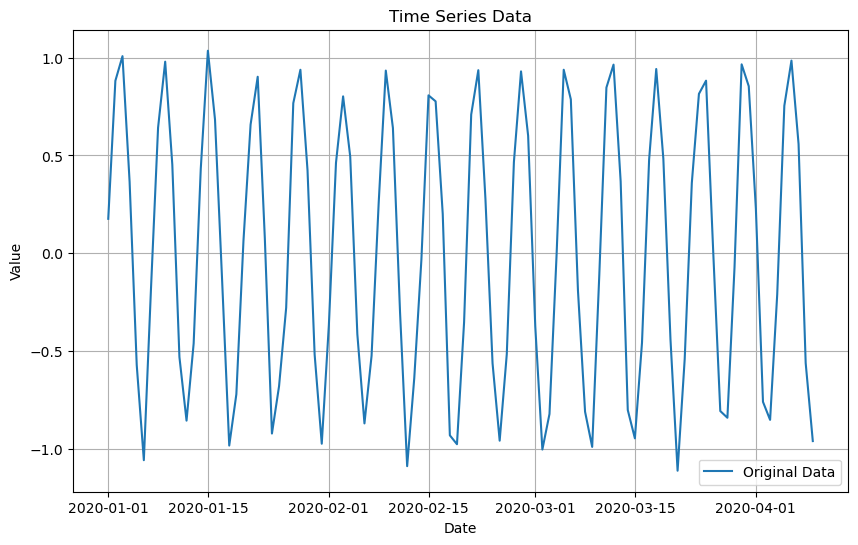

Train RMSE: 0.19071896329922433
Test RMSE: 0.17890037365907063


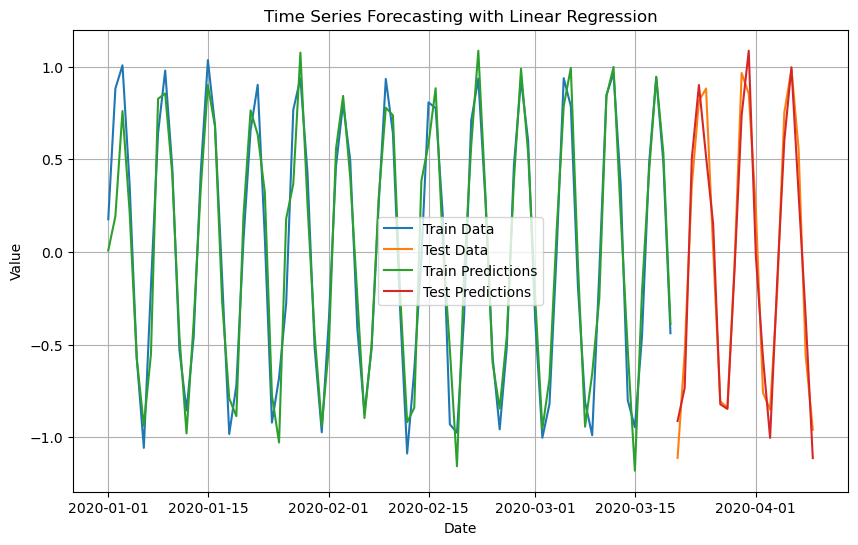

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic time series data
np.random.seed(0)
num_points = 100
time = pd.date_range(start='1/1/2020', periods=num_points, freq='D')
data = np.sin(np.arange(0, num_points)) + np.random.normal(0, 0.1, num_points)
df = pd.DataFrame({'Date': time, 'Value': data})

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Value'], label='Original Data')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Prepare data for training
X = pd.DataFrame({'lag1': df['Value'].shift(1).fillna(0),
                  'lag2': df['Value'].shift(2).fillna(0)})
y = df['Value']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][:len(y_train)], y_train, label='Train Data')
plt.plot(df['Date'][len(y_train):], y_test, label='Test Data')
plt.plot(df['Date'][:len(y_train)], train_predictions, label='Train Predictions')
plt.plot(df['Date'][len(y_train):], test_predictions, label='Test Predictions')
plt.title('Time Series Forecasting with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


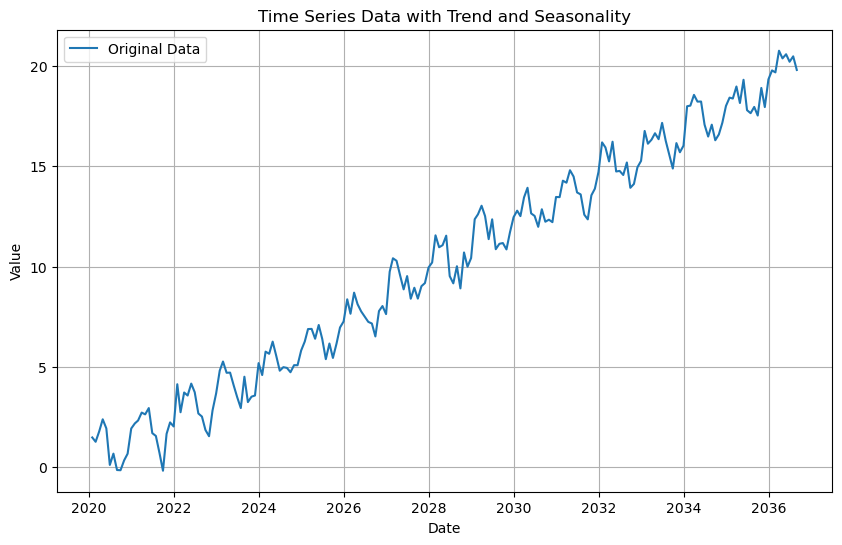

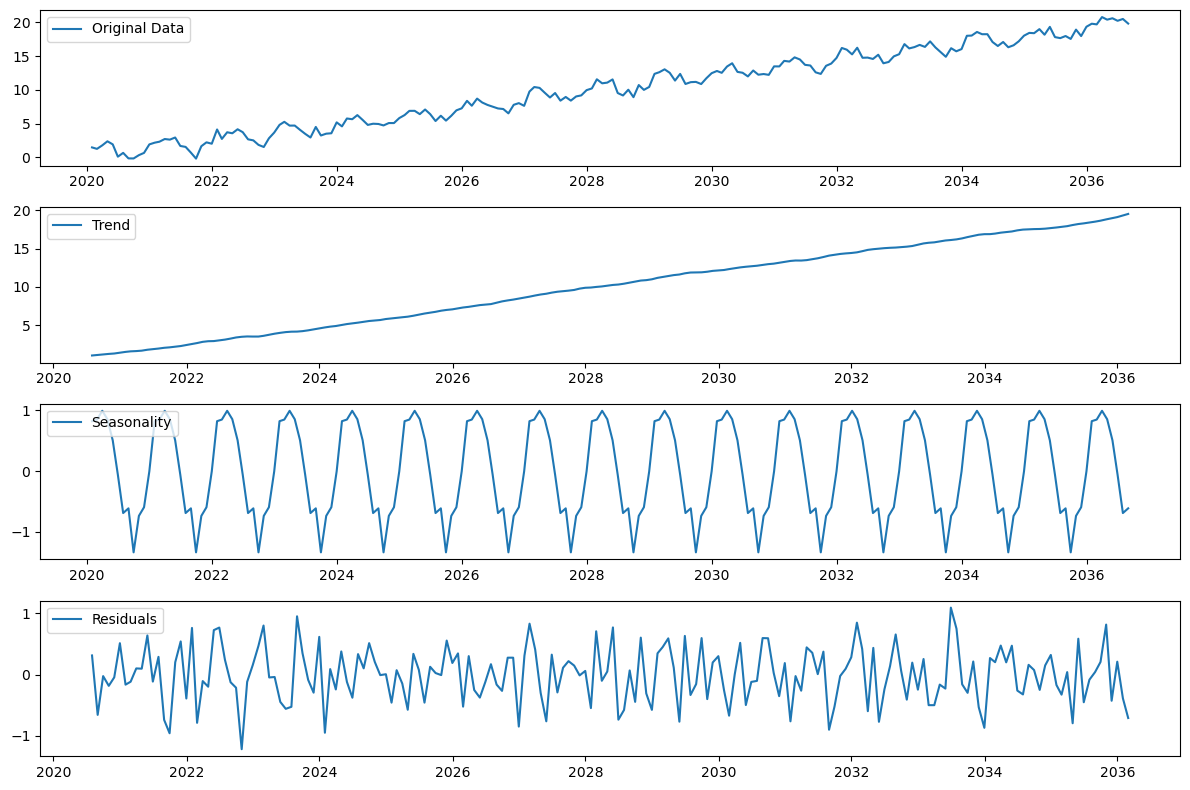

Test RMSE: 0.6902451754511386


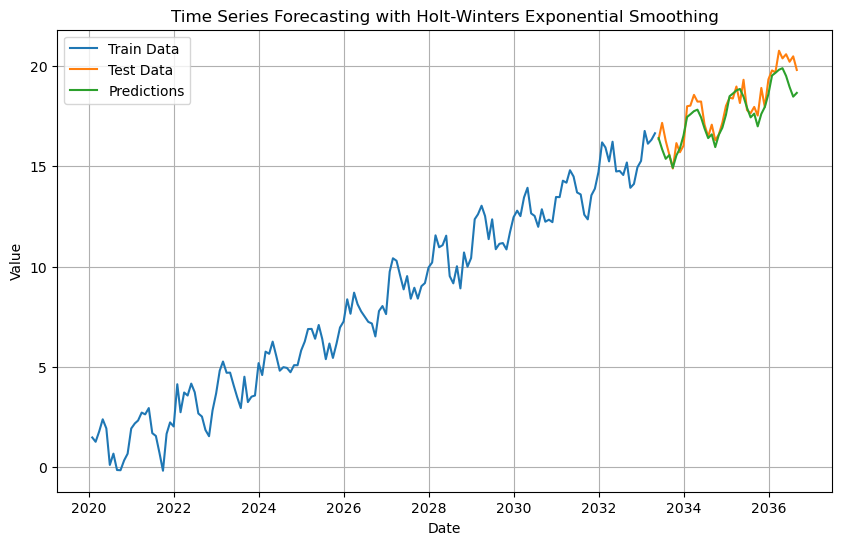

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Generate synthetic time series data with trend and seasonality
np.random.seed(0)
num_points = 200
time = pd.date_range(start='1/1/2020', periods=num_points, freq='M')
trend = np.arange(1, num_points + 1) * 0.1
seasonality = np.sin(np.arange(1, num_points + 1) * (2 * np.pi / 12))
data = trend + seasonality + np.random.normal(0, 0.5, num_points)
df = pd.DataFrame({'Date': time, 'Value': data})

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Value'], label='Original Data')
plt.title('Time Series Data with Trend and Seasonality')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Decompose the time series into trend, seasonality, and residuals
result = seasonal_decompose(df['Value'], model='additive', period=12)

# Plot decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Date'], df['Value'], label='Original Data')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(df['Date'], result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(df['Date'], result.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(df['Date'], result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Split data into train and test sets
train_size = int(0.8 * len(df))
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Fit Holt-Winters Exponential Smoothing model
model = ExponentialSmoothing(train_data['Value'], seasonal_periods=12, trend='add', seasonal='add').fit()

# Make predictions
predictions = model.forecast(len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Value'], predictions))
print(f"Test RMSE: {rmse}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Value'], label='Train Data')
plt.plot(test_data['Date'], test_data['Value'], label='Test Data')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('Time Series Forecasting with Holt-Winters Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


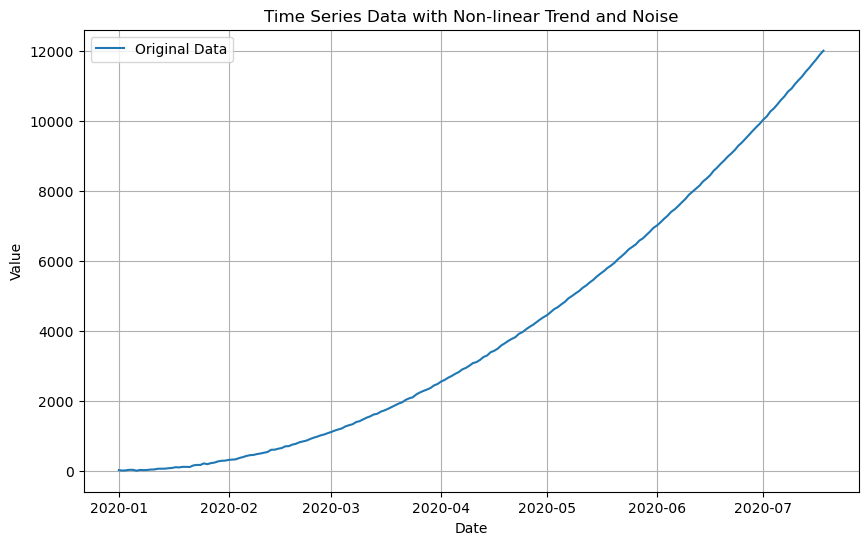

Test RMSE: 364.08724408262543


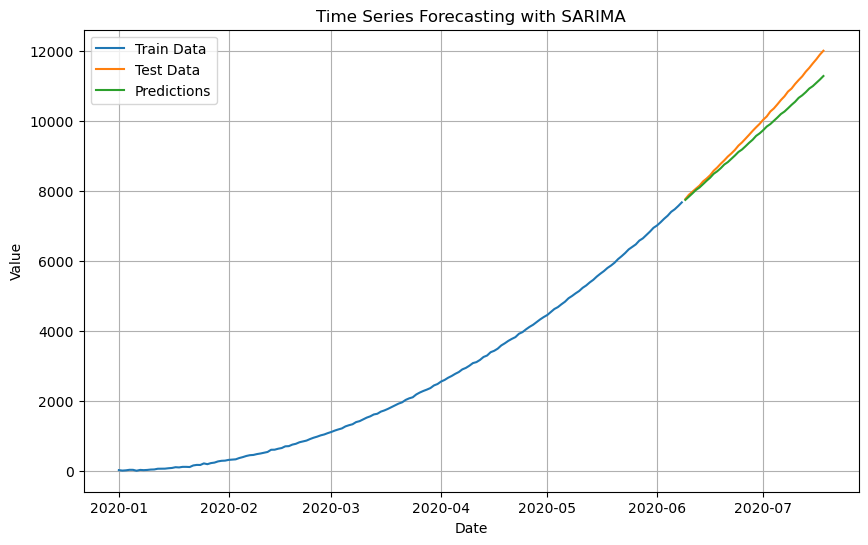

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Generate synthetic time series data with non-linear trend and noise
np.random.seed(0)
num_points = 200
time = pd.date_range(start='1/1/2020', periods=num_points, freq='D')
trend = 0.3 * np.square(np.arange(1, num_points + 1))
noise = np.random.normal(0, 10, num_points)
data = trend + noise
df = pd.DataFrame({'Date': time, 'Value': data})

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Value'], label='Original Data')
plt.title('Time Series Data with Non-linear Trend and Noise')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Split data into train and test sets
train_size = int(0.8 * len(df))
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Fit SARIMA model
model = SARIMAX(train_data['Value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = model.fit()

# Make predictions
predictions = sarima_results.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Value'], predictions))
print(f"Test RMSE: {rmse}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Value'], label='Train Data')
plt.plot(test_data['Date'], test_data['Value'], label='Test Data')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('Time Series Forecasting with SARIMA')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


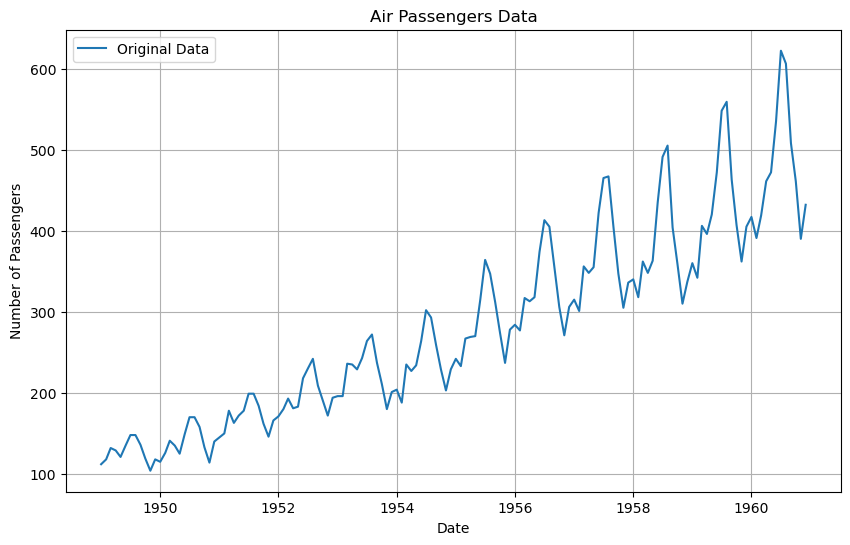

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Test RMSE: 30.141813002029618


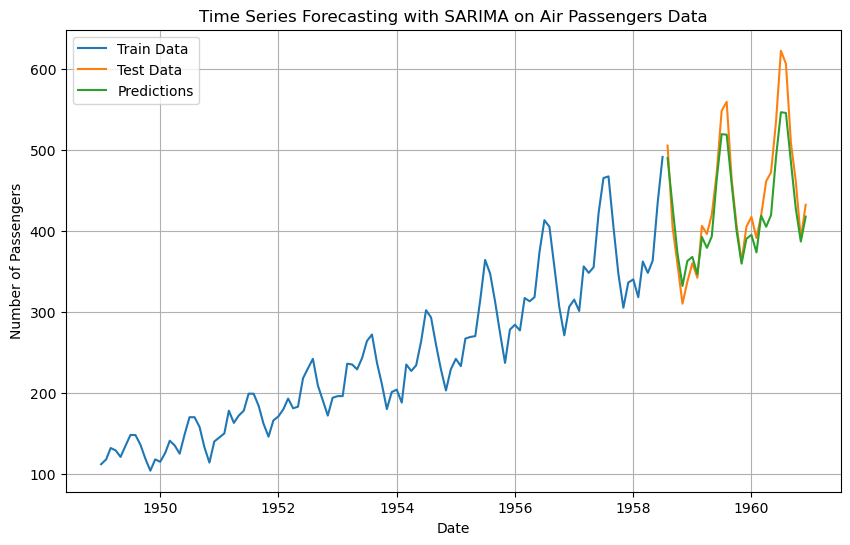

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load the Air Passengers dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')

# Convert the 'Month' column to datetime format and set it as the index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Passengers'], label='Original Data')
plt.title('Air Passengers Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

# Split data into train and test sets
train_size = int(0.8 * len(df))
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Fit SARIMA model
model = SARIMAX(train_data['Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = model.fit()

# Make predictions
predictions = sarima_results.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Passengers'], predictions))
print(f"Test RMSE: {rmse}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Passengers'], label='Train Data')
plt.plot(test_data.index, test_data['Passengers'], label='Test Data')
plt.plot(test_data.index, predictions, label='Predictions')
plt.title('Time Series Forecasting with SARIMA on Air Passengers Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


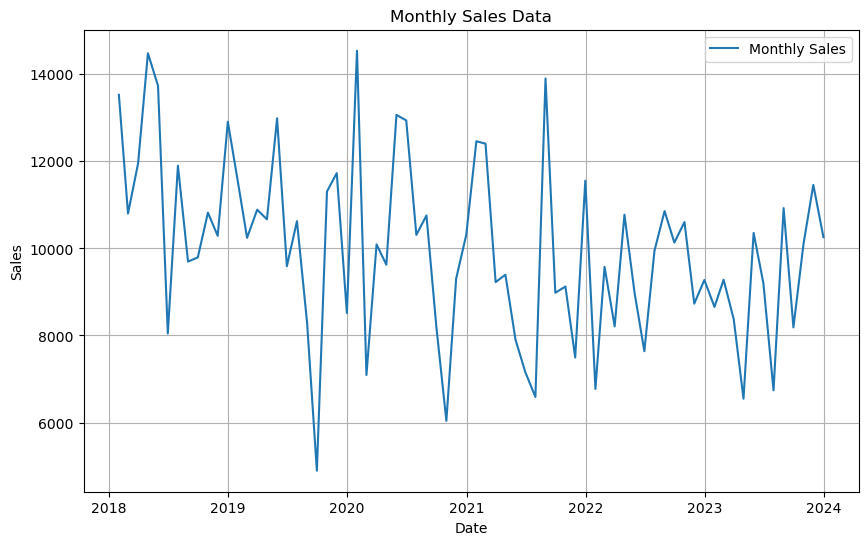

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 2496.0976627803225


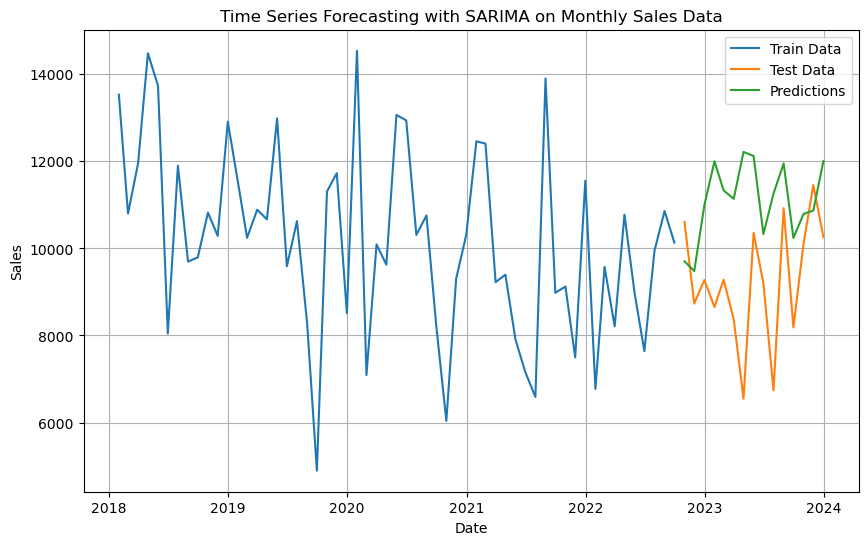

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Generate synthetic monthly sales data
np.random.seed(0)
start_date = '2018-01-01'
end_date = '2023-12-31'
dates = pd.date_range(start=start_date, end=end_date, freq='M')
sales = np.random.normal(loc=10000, scale=2000, size=len(dates))
sales = np.maximum(sales, 0)  # Ensure sales are non-negative
df = pd.DataFrame({'Date': dates, 'Sales': sales})

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Sales'], label='Monthly Sales')
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Split data into train and test sets
train_size = int(0.8 * len(df))
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Fit SARIMA model
model = SARIMAX(train_data['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = model.fit()

# Make predictions
predictions = sarima_results.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Sales'], predictions))
print(f"Test RMSE: {rmse}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Sales'], label='Train Data')
plt.plot(test_data['Date'], test_data['Sales'], label='Test Data')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('Time Series Forecasting with SARIMA on Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


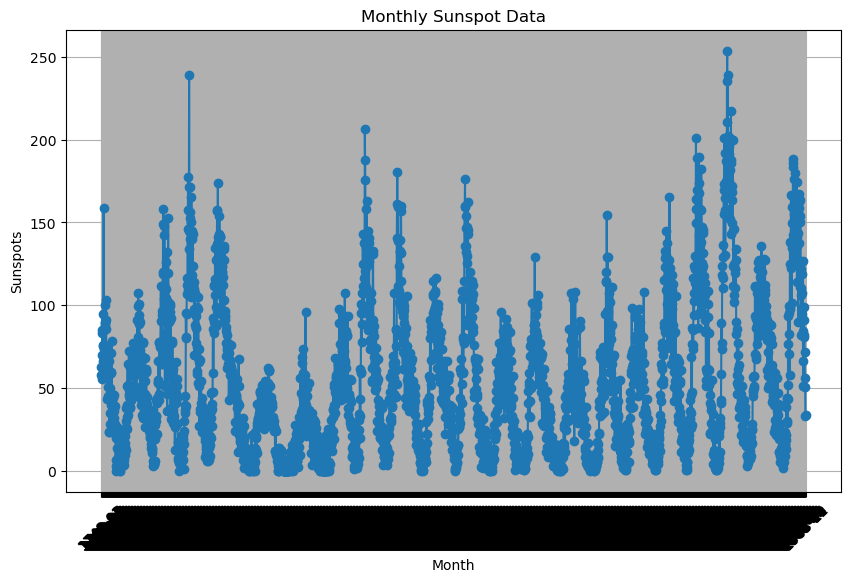

Test RMSE: 62.6761517866622


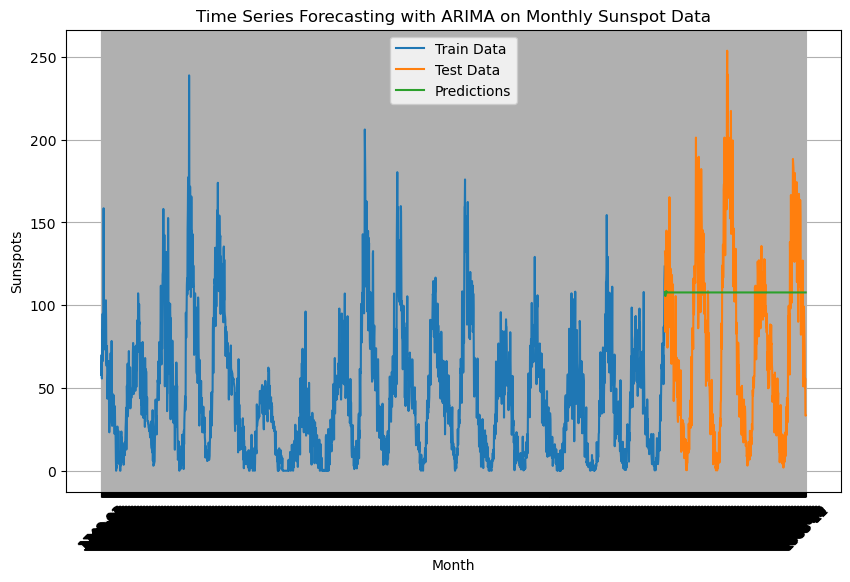

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the monthly sunspot dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Sunspots'], marker='o', linestyle='-')
plt.title('Monthly Sunspot Data')
plt.xlabel('Month')
plt.ylabel('Sunspots')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Split data into train and test sets
train_size = int(0.8 * len(df))
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data['Sunspots'], order=(5,1,0))
arima_results = model.fit()

# Make predictions
predictions = arima_results.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Sunspots'], predictions))
print(f"Test RMSE: {rmse}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data['Month'], train_data['Sunspots'], label='Train Data')
plt.plot(test_data['Month'], test_data['Sunspots'], label='Test Data')
plt.plot(test_data['Month'], predictions, label='Predictions')
plt.title('Time Series Forecasting with ARIMA on Monthly Sunspot Data')
plt.xlabel('Month')
plt.ylabel('Sunspots')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


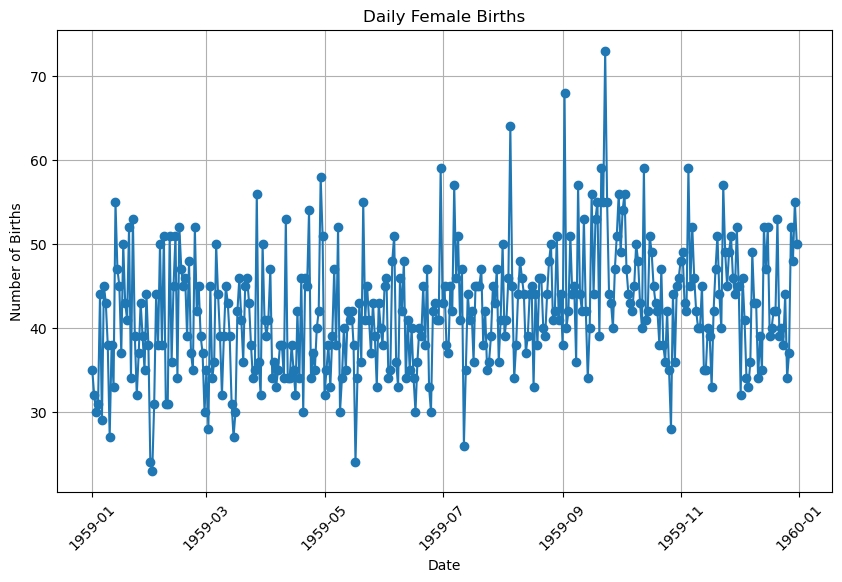

Test RMSE: 6.844619763148721


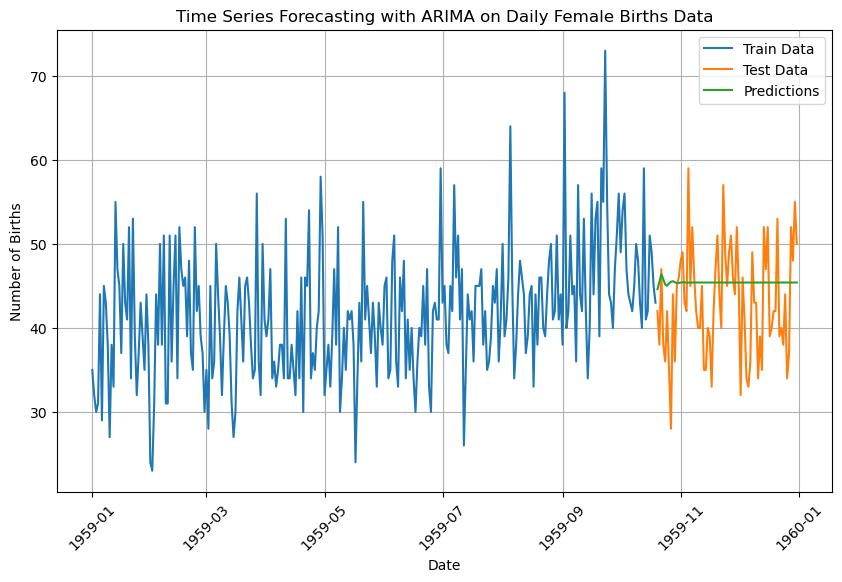

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the Daily Female Births dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"
df = pd.read_csv(url)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Births'], marker='o', linestyle='-')
plt.title('Daily Female Births')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Split data into train and test sets
train_size = int(0.8 * len(df))
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data['Births'], order=(5,1,0))
arima_results = model.fit()

# Make predictions
predictions = arima_results.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Births'], predictions))
print(f"Test RMSE: {rmse}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Births'], label='Train Data')
plt.plot(test_data['Date'], test_data['Births'], label='Test Data')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('Time Series Forecasting with ARIMA on Daily Female Births Data')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


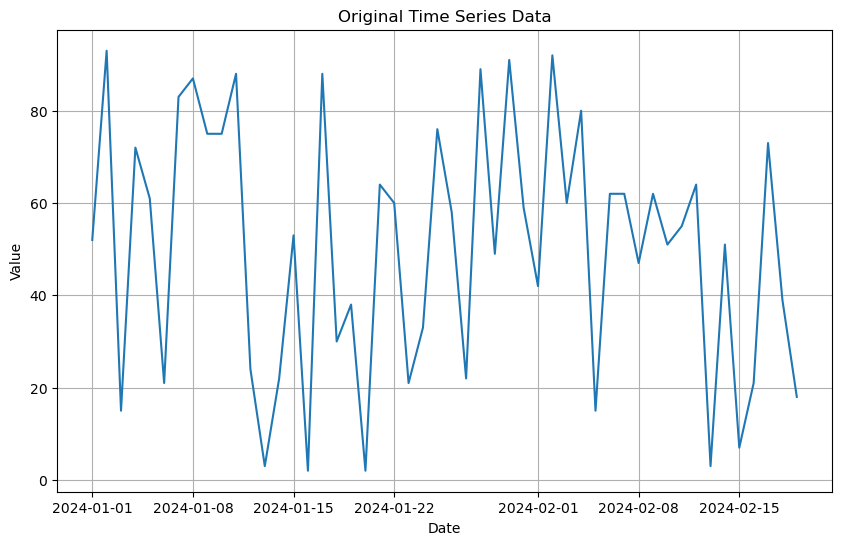

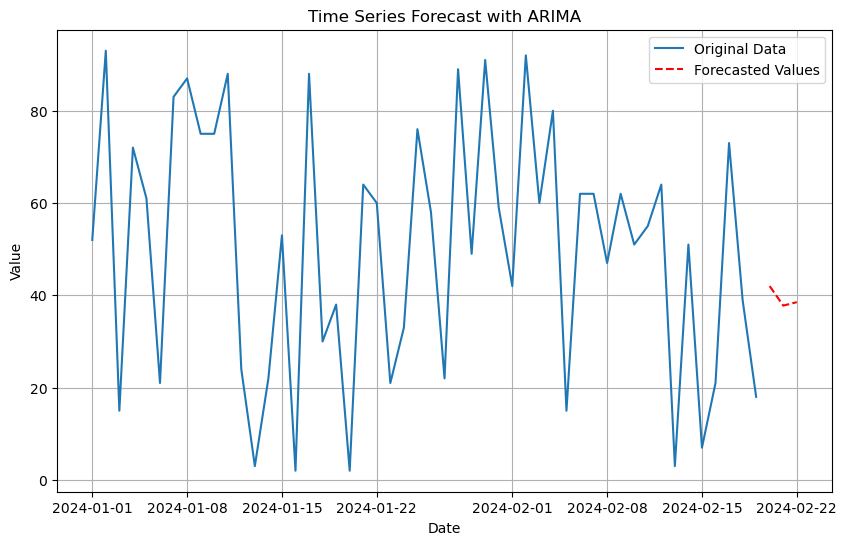

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate example time series data
np.random.seed(42)  # for reproducibility
date_range = pd.date_range(start='2024-01-01', periods=50, freq='D')
data = np.random.randint(1, 100, size=len(date_range))
ts = pd.Series(data, index=date_range)

# Plot the original time series data
plt.figure(figsize=(10, 6))
plt.plot(ts)
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Perform ARIMA forecasting
model = ARIMA(ts, order=(1, 1, 1))  # ARIMA(p, d, q)
results = model.fit()

# Forecast next 3 values
forecast_values = results.forecast(steps=3)

# Generate dates for forecasted values
next_dates = pd.date_range(start=date_range[-1], periods=4, freq='D')[1:]

# Plot original data with forecasted values
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original Data')
plt.plot(next_dates, forecast_values, 'r--', label='Forecasted Values')
plt.title('Time Series Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


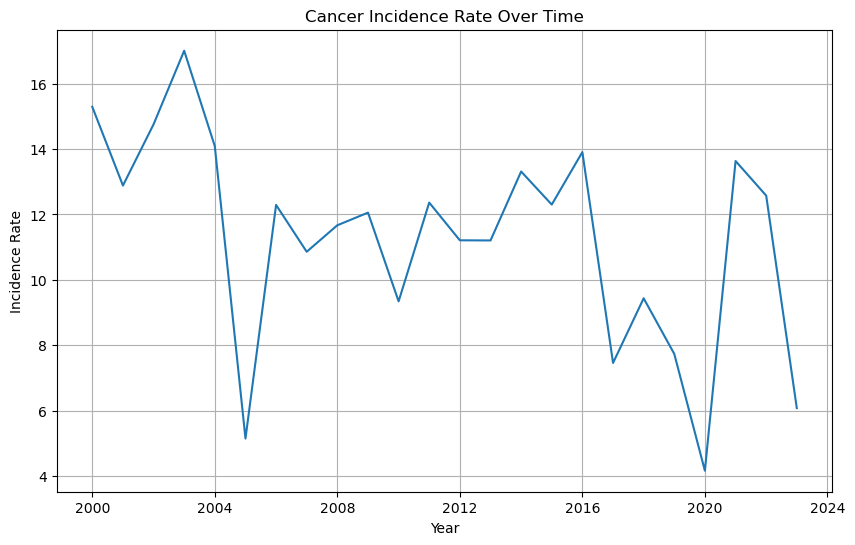

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


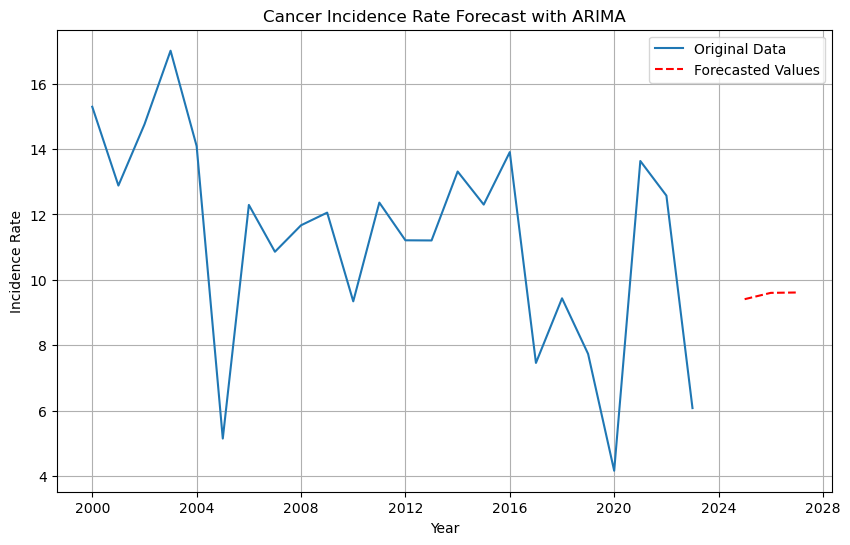

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a cancer dataset with 'Year' and 'Incidence_Rate' columns
# Load your dataset here. If you don't have one, I'll generate synthetic data for demonstration.

# Generating synthetic time series data
np.random.seed(0)
start_year = 2000
end_year = 2023
num_years = end_year - start_year + 1
years = np.arange(start_year, end_year + 1)
cancer_incidence_rate = np.random.normal(10, 3, num_years) + np.sin(np.arange(num_years)) * 2

# Create a DataFrame
cancer_df = pd.DataFrame({'Year': years, 'Incidence_Rate': cancer_incidence_rate})

# Convert 'Year' column to datetime
cancer_df['Year'] = pd.to_datetime(cancer_df['Year'], format='%Y')
cancer_df.set_index('Year', inplace=True)

# Plot the original time series data
plt.figure(figsize=(10, 6))
plt.plot(cancer_df)
plt.title('Cancer Incidence Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Incidence Rate')
plt.grid(True)
plt.show()

# Perform ARIMA forecasting
model = ARIMA(cancer_df, order=(1, 1, 1))  # ARIMA(p, d, q)
results = model.fit()

# Forecast next 3 values
forecast_values = results.forecast(steps=3)

# Generate dates for forecasted values
next_dates = pd.date_range(start=cancer_df.index[-1], periods=4, freq='Y')[1:]

# Plot original data with forecasted values
plt.figure(figsize=(10, 6))
plt.plot(cancer_df, label='Original Data')
plt.plot(next_dates, forecast_values, 'r--', label='Forecasted Values')
plt.title('Cancer Incidence Rate Forecast with ARIMA')
plt.xlabel('Year')
plt.ylabel('Incidence Rate')
plt.legend()
plt.grid(True)
plt.show()


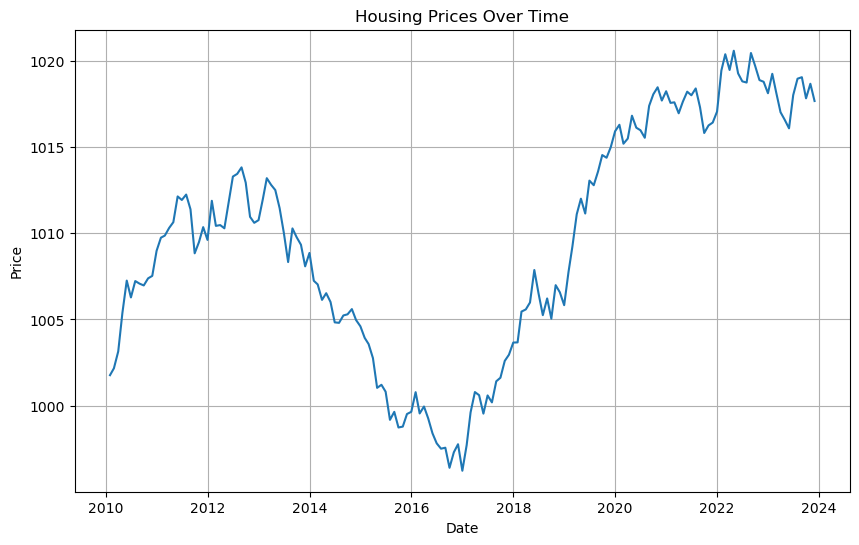

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


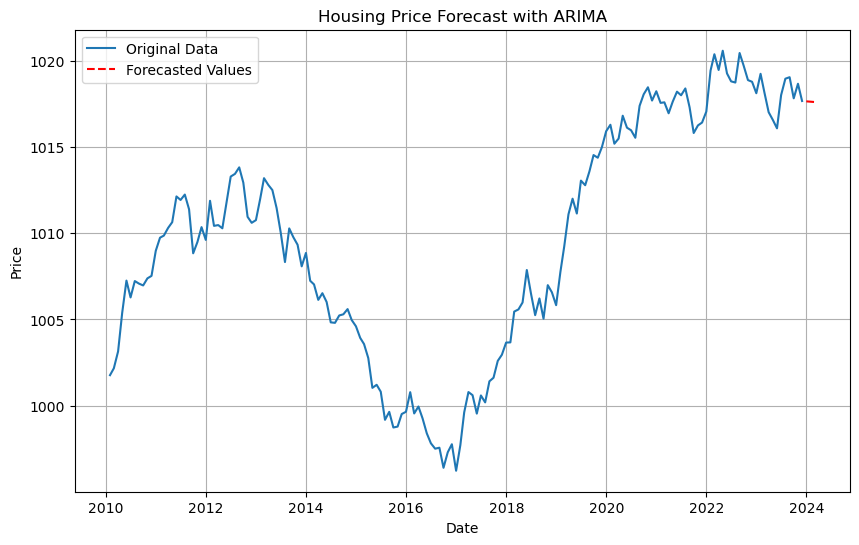

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate synthetic housing price data
np.random.seed(0)
start_date = '2010-01-01'
end_date = '2023-12-01'
num_months = pd.date_range(start=start_date, end=end_date, freq='M').shape[0]
housing_prices = 1000 + np.cumsum(np.random.normal(0, 1, num_months))

# Create a DataFrame
housing_df = pd.DataFrame({'Date': pd.date_range(start=start_date, end=end_date, freq='M'),
                           'Price': housing_prices})

# Convert 'Date' column to datetime and set it as index
housing_df['Date'] = pd.to_datetime(housing_df['Date'])
housing_df.set_index('Date', inplace=True)

# Plot the original time series data
plt.figure(figsize=(10, 6))
plt.plot(housing_df)
plt.title('Housing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Perform ARIMA forecasting
model = ARIMA(housing_df, order=(1, 1, 1))  # ARIMA(p, d, q)
results = model.fit()

# Forecast next 3 values
forecast_values = results.forecast(steps=3)

# Generate dates for forecasted values
next_dates = pd.date_range(start=housing_df.index[-1], periods=4, freq='M')[1:]

# Plot original data with forecasted values
plt.figure(figsize=(10, 6))
plt.plot(housing_df, label='Original Data')
plt.plot(next_dates, forecast_values, 'r--', label='Forecasted Values')
plt.title('Housing Price Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


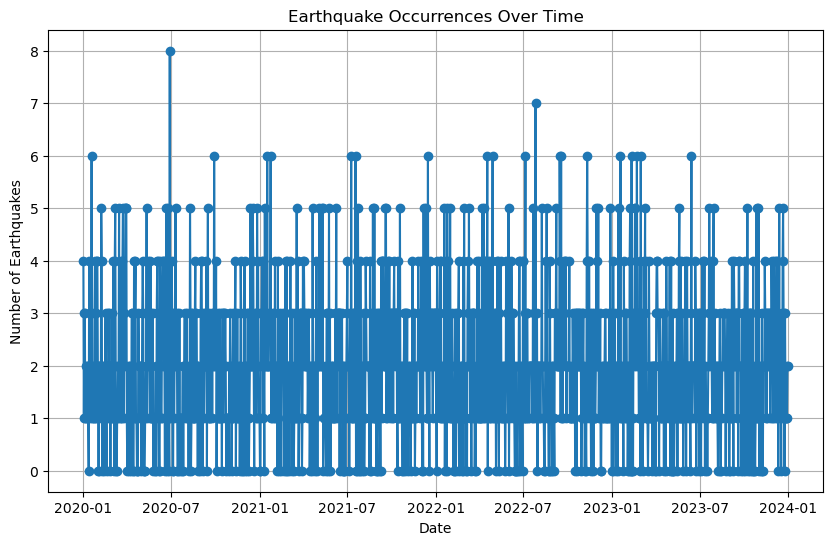

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


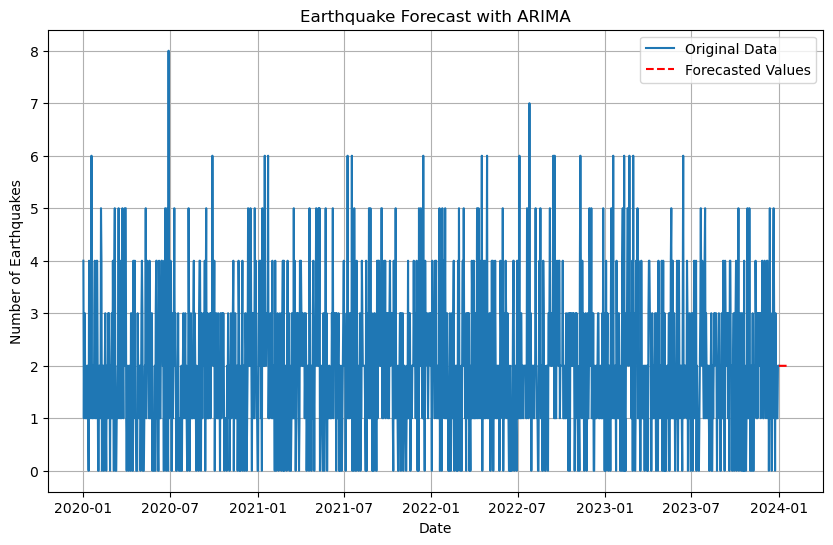

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate synthetic earthquake dataset
np.random.seed(42)
start_date = '2020-01-01'
end_date = '2023-12-31'
num_days = pd.date_range(start=start_date, end=end_date, freq='D')
earthquake_counts = np.random.poisson(2, len(num_days))  # Simulating earthquake occurrences

# Create a DataFrame
earthquake_df = pd.DataFrame({'Date': num_days, 'Earthquake_Count': earthquake_counts})

# Convert 'Date' column to datetime
earthquake_df['Date'] = pd.to_datetime(earthquake_df['Date'])
earthquake_df.set_index('Date', inplace=True)

# Plot the earthquake occurrences over time
plt.figure(figsize=(10, 6))
plt.plot(earthquake_df.index, earthquake_df['Earthquake_Count'], marker='o', linestyle='-')
plt.title('Earthquake Occurrences Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

# Train ARIMA model
model = ARIMA(earthquake_df, order=(1, 1, 1))  # ARIMA(p, d, q)
results = model.fit()

# Make forecasts for the next 20 time points
forecast_values = results.forecast(steps=20)

# Generate dates for forecasted values
next_dates = pd.date_range(start=end_date, periods=21, freq='D')[1:]

# Plot original data with forecasted values
plt.figure(figsize=(10, 6))
plt.plot(earthquake_df.index, earthquake_df['Earthquake_Count'], label='Original Data')
plt.plot(next_dates, forecast_values, 'r--', label='Forecasted Values')
plt.title('Earthquake Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.legend()
plt.grid(True)
plt.show()


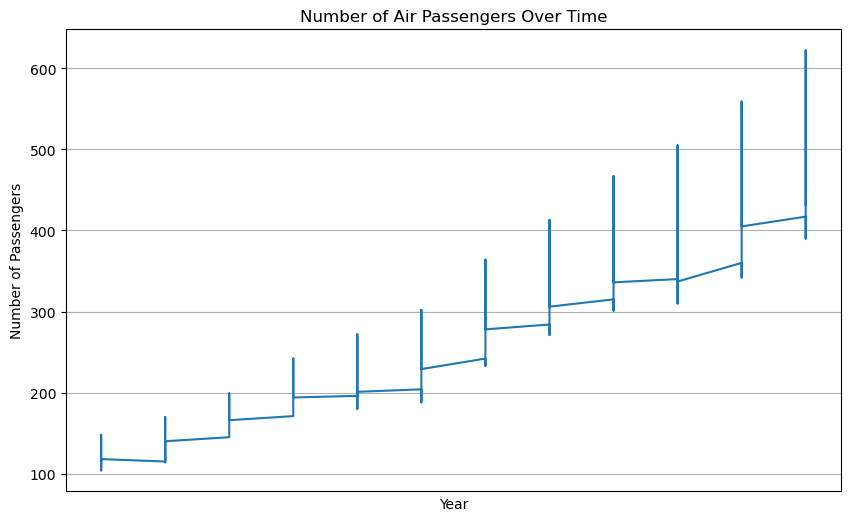

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


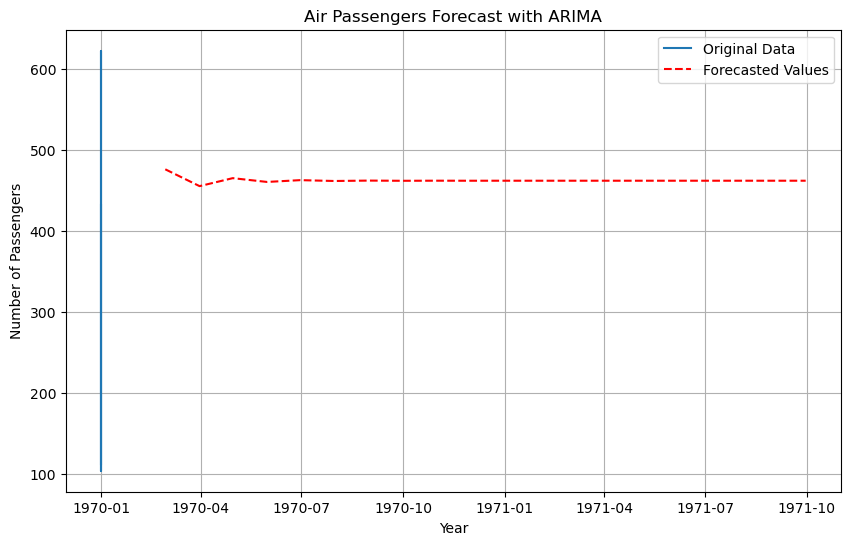

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the AirPassengers dataset
from statsmodels.datasets import get_rdataset
data = get_rdataset('AirPassengers').data

# Preprocess the dataset
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)

# Plot the number of passengers over time
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Number of Air Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

# Train ARIMA model
model = ARIMA(data, order=(1, 1, 1))  # ARIMA(p, d, q)
results = model.fit()

# Make forecasts for the next 20 time points
forecast_values = results.forecast(steps=20)

# Generate dates for forecasted values
next_dates = pd.date_range(start=data.index[-1], periods=21, freq='M')[1:]

# Plot original data with forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.plot(next_dates, forecast_values, 'r--', label='Forecasted Values')
plt.title('Air Passengers Forecast with ARIMA')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


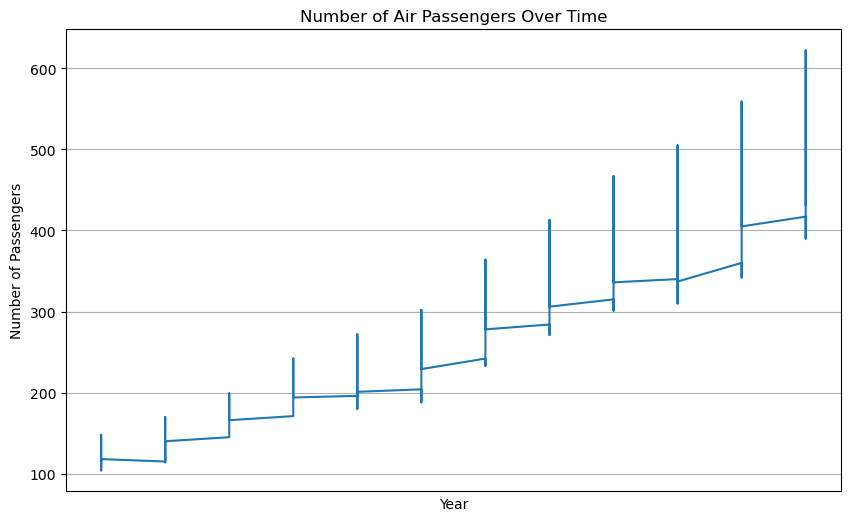

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


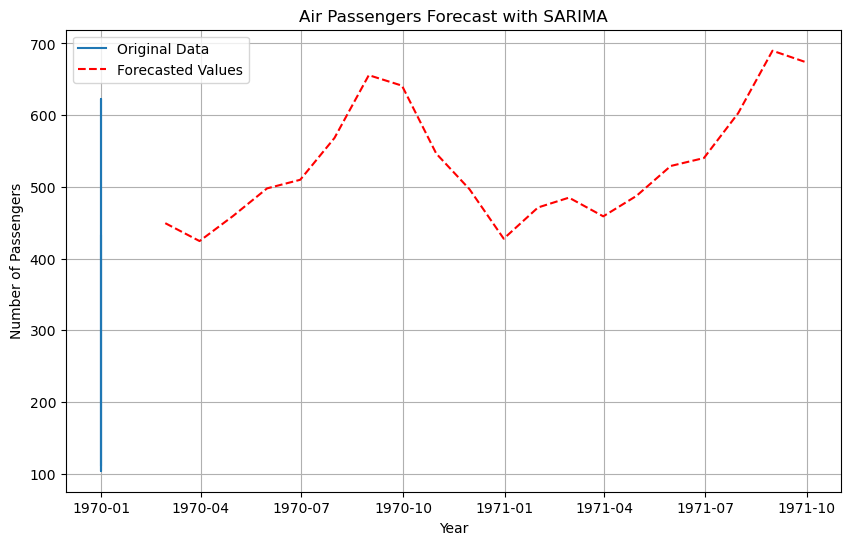

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the AirPassengers dataset
from statsmodels.datasets import get_rdataset
data = get_rdataset('AirPassengers').data

# Preprocess the dataset
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)

# Plot the number of passengers over time
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Number of Air Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

# Train SARIMA model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # SARIMA(p, d, q)(P, D, Q, s)
results = model.fit()

# Make forecasts for the next 20 time points
forecast_values = results.forecast(steps=20)

# Generate dates for forecasted values
next_dates = pd.date_range(start=data.index[-1], periods=21, freq='M')[1:]

# Plot original data with forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.plot(next_dates, forecast_values, 'r--', label='Forecasted Values')
plt.title('Air Passengers Forecast with SARIMA')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


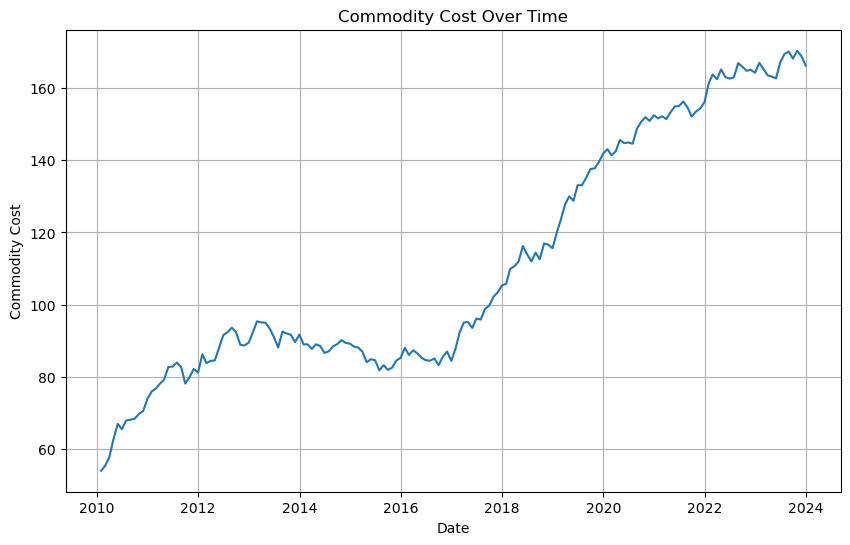

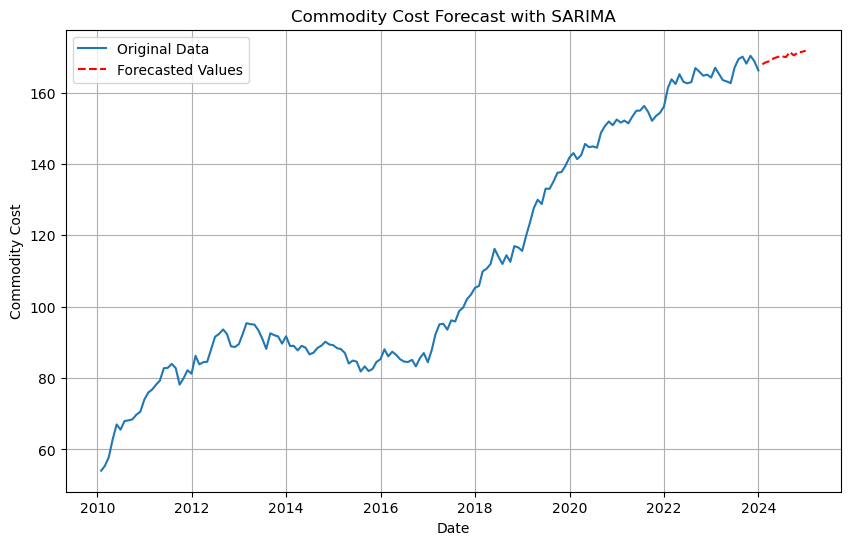

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Generate synthetic time series data for commodity cost
np.random.seed(0)
start_date = '2010-01-01'
end_date = '2023-12-31'
num_months = pd.date_range(start=start_date, end=end_date, freq='M')
commodity_cost = 50 + np.cumsum(np.random.normal(0.5, 2, len(num_months)))

# Create a DataFrame
data = pd.DataFrame({'Date': num_months, 'Commodity_Cost': commodity_cost})

# Plot the commodity cost over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Commodity_Cost'])
plt.title('Commodity Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Commodity Cost')
plt.grid(True)
plt.show()

# Train SARIMA model
model = SARIMAX(data['Commodity_Cost'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # SARIMA(p, d, q)(P, D, Q, s)
results = model.fit()

# Make forecasts for the next 12 months
forecast_values = results.forecast(steps=12)

# Generate dates for forecasted values
next_dates = pd.date_range(start=data['Date'].iloc[-1], periods=13, freq='M')[1:]

# Plot original data with forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Commodity_Cost'], label='Original Data')
plt.plot(next_dates, forecast_values, 'r--', label='Forecasted Values')
plt.title('Commodity Cost Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Commodity Cost')
plt.legend()
plt.grid(True)
plt.show()
